[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shambhuphysics/GenerativeAI/blob/main/C2P2.1/C2P2.1_Ngram_analysis.ipynb)



---

## 🎵 **Building a Language Model Using Histogram N-Gram Analysis**
💡 **Goal:** Learn how to build and analyze a language model that can **generate pop song lyrics** using **histogram N-gram analysis** with **NLTK**.

---

### 🔍 **Project Overview**

This project introduces the fundamentals of **language modeling** through the fun and creative task of **pop lyric generation**.
You’ll build **N-gram models** (Unigram, Bigram, and Trigram) using **NLTK** to:

* Examine how often words and word combinations appear.
* Discover **patterns and repetitions** typical of pop music.
* Understand the **structure and flow of language** in lyrics.

By mastering these concepts, you’ll gain a solid foundation for **advanced NLP (Natural Language Processing)** applications such as text generation, chatbots, and predictive typing.

---

### 🎯 **Learning Objectives**

By the end of this lab, you will be able to:

* ⚙️ **Implement histogram N-gram models** using NLTK.
* 📊 **Analyze word frequencies** and distributions in text.
* 💬 **Interpret linguistic patterns** that define pop songs.

---

### 🧩 **Project Steps**

1. **Setup & Preparation**

   * Install and import all required libraries.
   * Define helper functions for text processing.

2. **Language Modeling Workflow**

   * 🔠 **Tokenization:** Break text into words or tokens.
   * 1️⃣ **Unigram Model:** Analyze individual word frequencies.
   * 2️⃣ **Bigram Model:** Study pairs of consecutive words.
   * 3️⃣ **Trigram Model:** Explore three-word sequences for richer context.

---

### 🧰 **Required Libraries**

Before you begin, make sure these libraries are installed and imported:

* 🐼 **pandas** → Data handling and manipulation
* 🔢 **numpy** → Mathematical operations
* 🤖 **sklearn** → Machine learning utilities
* 🎨 **seaborn** → Data visualization
* 📈 **matplotlib** → Plotting and graphing tools

---

### 🚀 **Outcome**

After completing this project, you’ll:

* Understand how **N-gram models** capture linguistic structure.
* Be able to **analyze and generate text patterns** programmatically.
* Possess a strong starting point for **further NLP exploration** and creative text-based projects.

---



<div style="text-align:center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0WSVEN/song%20%281%29.png" alt="Image Description">
</div>



- **Scikit-learn**:  
  - The standard machine learning library in Python, offering algorithms for classification, regression, clustering, dimensionality reduction, and tools for model training, validation, and evaluation.[6][8]

- **NLTK (Natural Language Toolkit)**:  
  - Comprehensive toolkit for natural language processing tasks, including text tokenization, stemming, linguistic data analysis, and building language models required for NLP projects.[8]

- **Torch (PyTorch)**:  
  - Widely used deep learning framework for building and training neural networks, supporting GPU acceleration, dynamic computational graphs, and integration with other scientific libraries.[8]

- **Torchtext**:  
  - Utility library for PyTorch focused on preprocessing, loading, and managing text datasets for NLP models, enabling efficient workflow integration for sequence modeling tasks.[8]

- **Torchvision**:  
  - Provides image datasets, transformation utilities, and pretrained models for computer vision tasks within PyTorch projects, simplifying workflow for image classification, detection, and augmentation.[8]

- **Scipy**:  
  - Extends NumPy with advanced mathematical, optimization, and scientific routines (e.g., integration, signal processing), critical for computational research and engineering analyses.[8]



In [1]:
#install required library 
!pip install -q numpy pandas matplotlib seaborn scikit-learn
!pip install nltk
!pip install torch
!pip install torchtext 
!pip install torchvision 
!pip install --upgrade --force-reinstall scipy scikit-learn

  Using cached torch-2.8.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cusparse_cu12-12.5.8.93-py3-n

In [77]:
# Suppress all warnings to prevent output clutter during execution
import warnings
warnings.simplefilter('ignore')
warnings.warn = lambda *args, **kwargs: None
warnings.filterwarnings('ignore')

# Standard library imports for general utility and text processing
import re  # Regular expressions for pattern matching in text processing
import string  # Provides string constants and common string operations
import time  # Time functions, useful for delays and measuring performance
from collections import OrderedDict  # Dictionary that remembers insertion order

# Third-party imports for data science, visualization, and NLP
import matplotlib.pyplot as plt  # Plotting library to create static and interactive charts

import nltk  # Natural Language Toolkit, essential for text tokenization and linguistic analysis

import numpy as np  # Core numerical computing package with multidimensional arrays

import pandas as pd  # Data structures and analysis tools for tabular and time series data

import seaborn as sns

from sklearn.manifold import TSNE  
# Dimensionality reduction method, helps visualize high-dimensional data

from tqdm import tqdm  # Progress bar utility to track execution of loops

# Download essential NLTK language models for tokenization capabilities
nltk.download('punkt')
nltk.download('punkt_tab')

# PyTorch imports for deep learning model definition and training
import torch  # Core library for tensor computations and autograd support

import torch.nn as nn  # Neural network building blocks like layers and loss functions

import torch.nn.functional as F  # Functional API for activation functions and other ops

import torch.optim as optim  # Optimizers to update model parameters during training


[nltk_data] Downloading package punkt to /home/ucfbsbh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/ucfbsbh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
import re

def preprocess_string(s):
    s = re.sub(r"[^\w\s]", '', s)  # Remove punctuation and special characters
    s = re.sub(r"\s+", '', s)      # Remove all spaces, tabs, newlines
    s = re.sub(r"\d", '', s)       # Remove digits
    return s

# Example usage
input_text = "Hello, world! This is 2025."
clean_text = preprocess_string(input_text)
print(clean_text)  # Output: "HelloworldThisis"


HelloworldThisis




## 🧠 **Language Modeling**

### 🌍 **What Is Language Modeling?**

Language modeling is a **core concept in Natural Language Processing (NLP)** and **Artificial Intelligence (AI)**.
It focuses on **predicting the probability of word sequences** — essentially helping computers understand how words naturally flow in human language.

---

### 📊 **How It Works**

* Language models use **statistical methods** to learn patterns, structures, and relationships between words.
* By studying large text corpora, the model learns **which words are likely to appear together** and **in what order**.
* The goal is to estimate the **likelihood of a sentence or phrase**, making it sound grammatically and contextually correct.

---

### ⚙️ **Why It’s Important**

Language models are the foundation for many modern NLP applications, including:

* ✍️ **Text Generation** – creating new sentences or lyrics.
* 🌐 **Machine Translation** – converting text between languages.
* 🗣️ **Speech Recognition** – understanding spoken words.
* 💬 **Sentiment Analysis** – detecting emotions and opinions in text.
* 🤖 **Chatbots & Virtual Assistants** – generating human-like responses.

---

### 🎵 **Example Application**

To make this concept more engaging, you’ll explore language modeling using lyrics from
**“Never Gonna Give You Up” by Rick Astley (1987)** — a classic pop hit.
You’ll experiment with predicting or generating new lyrics **based on a given word or phrase**, revealing how models capture and replicate linguistic patterns found in real songs.

---

### 🚀 **In Summary**

Language modeling teaches machines to **understand, predict, and generate human language**.
It’s a crucial stepping stone toward creating intelligent systems capable of reading, writing, and communicating naturally.


In [9]:
song= """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""



---

## 🧰 **Natural Language Toolkit (NLTK)**

### 💡 **Overview**

**NLTK (Natural Language Toolkit)** is a popular **open-source Python library** designed for performing a wide range of **Natural Language Processing (NLP)** tasks.
It provides:

* 🧩 **Tools and algorithms** for text analysis.
* 📚 **Linguistic resources**, such as corpora and lexicons.
* ⚙️ **Functions** for manipulating and processing human language data.

With NLTK, you can easily perform operations like **tokenization**, **stemming**, **tagging**, **parsing**, and **text classification** — making it a go-to library for both beginners and researchers in NLP.

---

## ✂️ **Tokenization**

### 🔍 **What Is Tokenization?**

**Tokenization** is a fundamental NLP process that involves **splitting text into smaller units called tokens**.
These tokens can be:

* 📝 **Words**
* 📖 **Phrases**
* 🧾 **Sentences**
* 🔡 **Individual characters**

The choice depends on how detailed (granular) your text analysis needs to be.

---

### 🧠 **Focus in This Project**

For this project, you’ll use **Word Tokenization**, which:

* Treats **each word** as a separate token.
* Splits text based on **spaces and punctuation marks**.
* Helps analyze word frequencies and structures in lyrics or other text data.

---

### ⚙️ **Implementation Details**

To perform tokenization, you will use the **`word_tokenize()`** function from NLTK.
During this process, you will:

* 🔤 **Convert all text to lowercase** (remove capitalization).
* ❌ **Remove punctuation and symbols** to clean the data.
* ✅ **Extract clean word tokens** ready for analysis.

---

### 🚀 **Why It Matters**

Tokenization is the **first and most crucial step** in NLP.
It transforms raw text into a structured format that computers can **analyze, count, and model**, forming the foundation for advanced techniques like **language modeling**, **sentiment analysis**, and **text generation**.


In [10]:
from nltk.tokenize import word_tokenize

def preprocess(words):
    tokens = word_tokenize(words)
    tokens = [preprocess_string(w) for w in tokens]
    return [w.lower() for w in tokens if len(w)!=0 and (w in string.punctuation)]
  
tokens = preprocess(song)
tokens

[]

Tokenization
Tokenization breaks text into individual words (tokens). This is the first step in text analysis.

Example: "The cat sat" → ["the", "cat", "sat"]

In [14]:
from nltk.tokenize import word_tokenize

def preprocess(text):
    """Tokenize and clean text"""
    tokens = word_tokenize(text)
    tokens = [preprocess_string(w) for w in tokens]
    return [w.lower() for w in tokens if len(w) > 0]

tokens= preprocess(song)
tokens

['we',
 'are',
 'no',
 'strangers',
 'to',
 'love',
 'you',
 'know',
 'the',
 'rules',
 'and',
 'so',
 'do',
 'i',
 'a',
 'full',
 'commitments',
 'what',
 'im',
 'thinking',
 'of',
 'you',
 'wouldnt',
 'get',
 'this',
 'from',
 'any',
 'other',
 'guy',
 'i',
 'just',
 'wan',
 'na',
 'tell',
 'you',
 'how',
 'im',
 'feeling',
 'got',
 'ta',
 'make',
 'you',
 'understand',
 'never',
 'gon',
 'na',
 'give',
 'you',
 'up',
 'never',
 'gon',
 'na',
 'let',
 'you',
 'down',
 'never',
 'gon',
 'na',
 'run',
 'around',
 'and',
 'desert',
 'you',
 'never',
 'gon',
 'na',
 'make',
 'you',
 'cry',
 'never',
 'gon',
 'na',
 'say',
 'goodbye',
 'never',
 'gon',
 'na',
 'tell',
 'a',
 'lie',
 'and',
 'hurt',
 'you',
 'weve',
 'known',
 'each',
 'other',
 'for',
 'so',
 'long',
 'your',
 'hearts',
 'been',
 'aching',
 'but',
 'youre',
 'too',
 'shy',
 'to',
 'say',
 'it',
 'inside',
 'we',
 'both',
 'know',
 'whats',
 'been',
 'going',
 'on',
 'we',
 'know',
 'the',
 'game',
 'and',
 'were',
 'gon',

# Frequency Distribution

In [ ]:
# create frequency distribution of tokens 
fdist = nltk.FreqDist(tokens)
fdist.keys()

dict_keys(['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules', 'and', 'so', 'do', 'i', 'a', 'full', 'commitments', 'what', 'im', 'thinking', 'of', 'wouldnt', 'get', 'this', 'from', 'any', 'other', 'guy', 'just', 'wan', 'na', 'tell', 'how', 'feeling', 'got', 'ta', 'make', 'understand', 'never', 'gon', 'give', 'up', 'let', 'down', 'run', 'around', 'desert', 'cry', 'say', 'goodbye', 'lie', 'hurt', 'weve', 'known', 'each', 'for', 'long', 'your', 'hearts', 'been', 'aching', 'but', 'youre', 'too', 'shy', 'it', 'inside', 'both', 'whats', 'going', 'on', 'game', 'were', 'play', 'if', 'ask', 'me', 'dont', 'blind', 'see'])

In [48]:
fdist.values()

dict_values([5, 1, 1, 1, 4, 1, 37, 5, 3, 1, 16, 3, 1, 3, 7, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 40, 9, 3, 3, 2, 2, 8, 2, 36, 38, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1])

<BarContainer object of 10 artists>

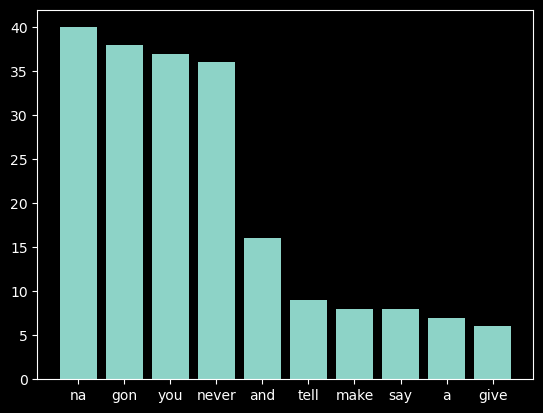

In [51]:
def plot_dist(fdist):
    words_list = [ word for word, _ in fdist.most_common(10)]
    count_list = [ count for _,count in fdist.most_common(10)]
    return plt.bar(words_list, count_list)
  
plot_dist(fdist=fdist)

# Unigram Model 
 - A unigram Model treats each word indepently and calculates
    ` P(word) = Count(word)/Total_words `

 - Limitation: Unigram ignore context, they predict based only on word frequency, not word order. 

In [32]:
TOTAL_WORDS = sum(fdist.values())

def unigram_prob(word):
    prob = fdist[word]/TOTAL_WORDS
    return prob 
for word in fdist.keys():
    print(f" Total words in unigram {TOTAL_WORDS}")
    print(f"Probabilty of '{word}' is {unigram_prob(word)*100:.2f}")

 Total words in unigram 385
Probabilty of 'we' is 1.30
 Total words in unigram 385
Probabilty of 'are' is 0.26
 Total words in unigram 385
Probabilty of 'no' is 0.26
 Total words in unigram 385
Probabilty of 'strangers' is 0.26
 Total words in unigram 385
Probabilty of 'to' is 1.04
 Total words in unigram 385
Probabilty of 'love' is 0.26
 Total words in unigram 385
Probabilty of 'you' is 9.61
 Total words in unigram 385
Probabilty of 'know' is 1.30
 Total words in unigram 385
Probabilty of 'the' is 0.78
 Total words in unigram 385
Probabilty of 'rules' is 0.26
 Total words in unigram 385
Probabilty of 'and' is 4.16
 Total words in unigram 385
Probabilty of 'so' is 0.78
 Total words in unigram 385
Probabilty of 'do' is 0.26
 Total words in unigram 385
Probabilty of 'i' is 0.78
 Total words in unigram 385
Probabilty of 'a' is 1.82
 Total words in unigram 385
Probabilty of 'full' is 0.26
 Total words in unigram 385
Probabilty of 'commitments' is 0.26
 Total words in unigram 385
Probabilty

<BarContainer object of 10 artists>

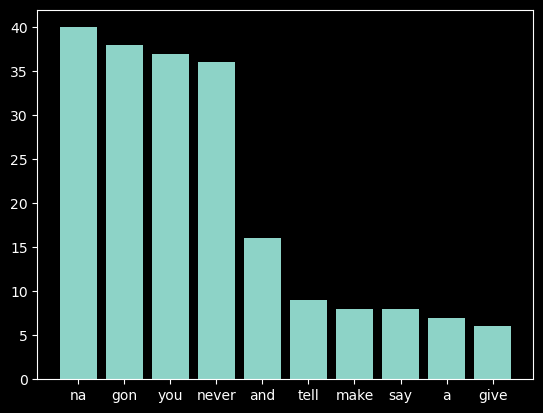

In [53]:
freq_unigram = fdist
plot_dist(freq_unigram) 

# Bigram Model 
 - A bigram model considers pairs of consecutive words and calculates:

   - `P(word2 | word1) = Count(word1,word2)/Count(word1)`

 - Advantage: Bigrams caputre simple context by considering the previous word

### Create Biagram 

In [31]:
# Create Bigram
bigrams = list(nltk.bigrams(tokens))

# Display first 5 bigrams:
print(bigrams[0:5])

# Create Frequency Distribution 
freq_biagrams = nltk.FreqDist(bigrams)
print(f"Total unique bigram = {len(freq_biagrams)}")

[('we', 'are'), ('are', 'no'), ('no', 'strangers'), ('strangers', 'to'), ('to', 'love')]
Total unique bigram = 119


In [139]:
def df_grams_plot(freq_grams = freq_biagrams):
    df_bigram = pd.DataFrame.from_dict(dict(zip (freq_grams.keys(), freq_grams.values())), orient='index')
    df_bigram.columns = ['Count']
    df_bigram = df_bigram.sort_values(by='Count', ascending=False)
    plot = df_bigram.head(10).plot(kind='bar')
    return plot

<Axes: >

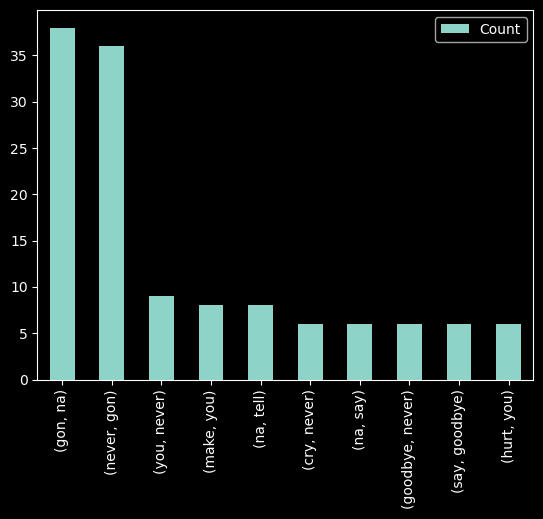

In [136]:
df_grams_plot(freq_grams=freq_biagrams)

### Calculate Probability


In [158]:
def bigrams_prob(word1,word2):
    bigrams_count = freq_biagrams[(word1,word2)]
    word1_count = fdist[word1]
    bigrams_prob = bigrams_count/word1_count
    if word1_count == 0:
       return 0 
    return bigrams_prob

for bigram in freq_biagrams.keys():
    print(f"The probability of {bigram}: {bigrams_prob(bigram[0], bigram[1])}")   

The probability of ('we', 'are'): 0.2
The probability of ('are', 'no'): 1.0
The probability of ('no', 'strangers'): 1.0
The probability of ('strangers', 'to'): 1.0
The probability of ('to', 'love'): 0.25
The probability of ('love', 'you'): 1.0
The probability of ('you', 'know'): 0.02702702702702703
The probability of ('know', 'the'): 0.6
The probability of ('the', 'rules'): 0.3333333333333333
The probability of ('rules', 'and'): 1.0
The probability of ('and', 'so'): 0.0625
The probability of ('so', 'do'): 0.3333333333333333
The probability of ('do', 'i'): 1.0
The probability of ('i', 'a'): 0.3333333333333333
The probability of ('a', 'full'): 0.14285714285714285
The probability of ('full', 'commitments'): 1.0
The probability of ('commitments', 'what'): 1.0
The probability of ('what', 'im'): 1.0
The probability of ('im', 'thinking'): 0.25
The probability of ('thinking', 'of'): 1.0
The probability of ('of', 'you'): 1.0
The probability of ('you', 'wouldnt'): 0.02702702702702703
The probabi

### Predict Next Word

In [126]:
def predict_next_word(word, freq_grams, fdist, vocab):
    prediction ={}
    for next_word in vocab:
        if isinstance(word, str):
           count = freq_grams[(word, next_word)]
           total = fdist[word]
        else: #use Trigram
           count = freq_grams[*word,next_word]
           total = freq_biagrams[word]
        
        if total>0:
           prediction[next_word] = count/total 
    # Sort by Probability
    sorted_preds = sorted(prediction.items(), key=lambda x: x[1], reverse=True)
    return sorted_preds

In [130]:
vocab = set(tokens)
predict_next_word('the', freq_biagrams, fdist, vocab)

[('game', 0.6666666666666666),
 ('rules', 0.3333333333333333),
 ('hearts', 0.0),
 ('desert', 0.0),
 ('dont', 0.0),
 ('feeling', 0.0),
 ('your', 0.0),
 ('let', 0.0),
 ('what', 0.0),
 ('were', 0.0),
 ('other', 0.0),
 ('gon', 0.0),
 ('inside', 0.0),
 ('no', 0.0),
 ('na', 0.0),
 ('make', 0.0),
 ('for', 0.0),
 ('down', 0.0),
 ('but', 0.0),
 ('this', 0.0),
 ('see', 0.0),
 ('so', 0.0),
 ('blind', 0.0),
 ('commitments', 0.0),
 ('wan', 0.0),
 ('the', 0.0),
 ('tell', 0.0),
 ('any', 0.0),
 ('and', 0.0),
 ('each', 0.0),
 ('give', 0.0),
 ('play', 0.0),
 ('if', 0.0),
 ('a', 0.0),
 ('full', 0.0),
 ('from', 0.0),
 ('too', 0.0),
 ('long', 0.0),
 ('thinking', 0.0),
 ('got', 0.0),
 ('been', 0.0),
 ('goodbye', 0.0),
 ('on', 0.0),
 ('aching', 0.0),
 ('known', 0.0),
 ('never', 0.0),
 ('whats', 0.0),
 ('strangers', 0.0),
 ('are', 0.0),
 ('to', 0.0),
 ('cry', 0.0),
 ('i', 0.0),
 ('ta', 0.0),
 ('love', 0.0),
 ('get', 0.0),
 ('im', 0.0),
 ('up', 0.0),
 ('you', 0.0),
 ('lie', 0.0),
 ('wouldnt', 0.0),
 ('we', 0.0

In [129]:
freq_biagrams

FreqDist({('gon', 'na'): 38, ('never', 'gon'): 36, ('you', 'never'): 9, ('na', 'tell'): 8, ('make', 'you'): 8, ('na', 'give'): 6, ('give', 'you'): 6, ('you', 'up'): 6, ('up', 'never'): 6, ('na', 'let'): 6, ...})

# Trigram Models
- A trigram model considers triplets of consecutive words:
   - `P(word3| word1,word2) = Count(word1,word2,word3)/Count(word1,word2`)

### Creating Trigrams

<Axes: >

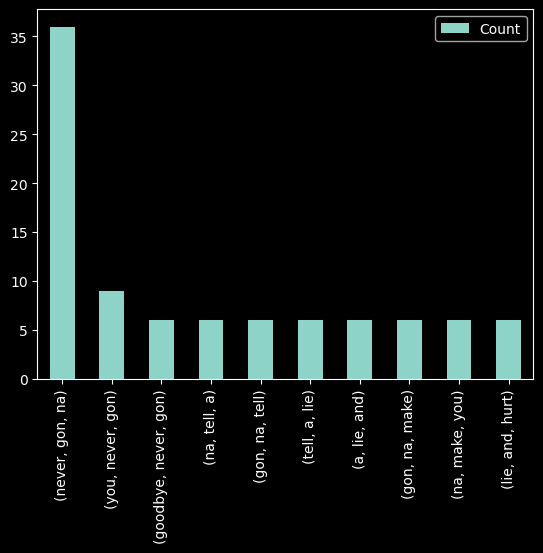

In [140]:
trigrams = list(nltk.trigrams(tokens))
freq_trigrams = nltk.FreqDist(trigrams)
df_grams_plot(freq_grams=freq_trigrams)

In [161]:
for key1 in freq_trigrams.keys():
    print(key1)
    break

('we', 'are', 'no')


# Calculate Probabilty;

In [156]:
freq_biagrams

FreqDist({('gon', 'na'): 38, ('never', 'gon'): 36, ('you', 'never'): 9, ('na', 'tell'): 8, ('make', 'you'): 8, ('na', 'give'): 6, ('give', 'you'): 6, ('you', 'up'): 6, ('up', 'never'): 6, ('na', 'let'): 6, ...})

In [165]:
trigrams = list(nltk.trigrams(tokens))
freq_trigrams = nltk.FreqDist(trigrams)
bigrams = list(nltk.bigrams(tokens))
freq_bigrams = nltk.FreqDist(bigrams)
def trigrams_prob(word1, word2, word3):
    trigrams_count = freq_trigrams[(word1, word2, word3)]
    bigram_count = freq_bigrams[(word1,word2)]
    if bigram_count == 0:
       return 0
    trigram_prob = trigrams_count/bigram_count
    return trigram_prob
 
for trigram in freq_trigrams.keys():
    print(f"The probability of {trigram}: {trigrams_prob(trigram[0], trigram[1], trigram[2])}") 

The probability of ('we', 'are', 'no'): 1.0
The probability of ('are', 'no', 'strangers'): 1.0
The probability of ('no', 'strangers', 'to'): 1.0
The probability of ('strangers', 'to', 'love'): 1.0
The probability of ('to', 'love', 'you'): 1.0
The probability of ('love', 'you', 'know'): 1.0
The probability of ('you', 'know', 'the'): 1.0
The probability of ('know', 'the', 'rules'): 0.3333333333333333
The probability of ('the', 'rules', 'and'): 1.0
The probability of ('rules', 'and', 'so'): 1.0
The probability of ('and', 'so', 'do'): 1.0
The probability of ('so', 'do', 'i'): 1.0
The probability of ('do', 'i', 'a'): 1.0
The probability of ('i', 'a', 'full'): 1.0
The probability of ('a', 'full', 'commitments'): 1.0
The probability of ('full', 'commitments', 'what'): 1.0
The probability of ('commitments', 'what', 'im'): 1.0
The probability of ('what', 'im', 'thinking'): 1.0
The probability of ('im', 'thinking', 'of'): 1.0
The probability of ('thinking', 'of', 'you'): 1.0
The probability of (

In [166]:
trigrams = list(nltk.trigrams(tokens))
bigrams = list(nltk.bigrams(tokens))

freq_trigrams = nltk.FreqDist(trigrams)
freq_bigrams = nltk.FreqDist(bigrams)

def trigram_prob(word1, word2, word3):
    trigram_count = freq_trigrams.get((word1, word2, word3), 0)
    bigram_count = freq_bigrams.get((word1, word2), 0)
    if bigram_count == 0:
        return 0
    return trigram_count / bigram_count

for trigram in freq_trigrams.keys():
    print(f"The probability of {trigram}: {trigram_prob(trigram[0], trigram[1], trigram[2])}")


The probability of ('we', 'are', 'no'): 1.0
The probability of ('are', 'no', 'strangers'): 1.0
The probability of ('no', 'strangers', 'to'): 1.0
The probability of ('strangers', 'to', 'love'): 1.0
The probability of ('to', 'love', 'you'): 1.0
The probability of ('love', 'you', 'know'): 1.0
The probability of ('you', 'know', 'the'): 1.0
The probability of ('know', 'the', 'rules'): 0.3333333333333333
The probability of ('the', 'rules', 'and'): 1.0
The probability of ('rules', 'and', 'so'): 1.0
The probability of ('and', 'so', 'do'): 1.0
The probability of ('so', 'do', 'i'): 1.0
The probability of ('do', 'i', 'a'): 1.0
The probability of ('i', 'a', 'full'): 1.0
The probability of ('a', 'full', 'commitments'): 1.0
The probability of ('full', 'commitments', 'what'): 1.0
The probability of ('commitments', 'what', 'im'): 1.0
The probability of ('what', 'im', 'thinking'): 1.0
The probability of ('im', 'thinking', 'of'): 1.0
The probability of ('thinking', 'of', 'you'): 1.0
The probability of (


## 🧠 What we Did

we correctly calculated:
$$
P(\text{word}_3 \mid \text{word}_1, \text{word}_2) = \frac{\text{Count(word1, word2, word3)}}{\text{Count(word1, word2)}}
$$
for each trigram in the song’s tokens.

---

## ⚠️ Why Most Probabilities Are 1.0

Most lines in wer song are *unique sequences* of words.
That means:

* Each **bigram** (e.g., `('we', 'are')`) appears only once.
* Each **trigram** (e.g., `('we', 'are', 'no')`) appears only once too.

So:
$$
\text{Count(('we','are','no'))} = 1 \quad \text{and} \quad \text{Count(('we','are'))} = 1
$$

Hence:
$$
P = 1/1 = 1.0
$$

That’s why almost all probabilities are **1.0** — wer text is *too small* and *too repetitive* to produce rich probability distributions.

---

## 📉 Why Some Probabilities Are < 1

The few lines where the same bigram occurs with **different third words** lead to lower probabilities.
For example:

```
('gon', 'na', 'give')
('gon', 'na', 'let')
('gon', 'na', 'run')
('gon', 'na', 'make')
('gon', 'na', 'say')
('gon', 'na', 'tell')
('gon', 'na', 'play')
```

Here, `('gon', 'na')` appears **many times**, followed by different words.
So, for example:

$$
\text{Count(('gon','na'))} = 19,\quad \text{Count(('gon','na','give'))} = 3
$$

$
P = 3 / 19 = 0.1579
$

✅ **That’s exactly what wer output shows — which is *correct*!**

---

## ✅ So, Is the Output “Correct”?

**Yes — it’s mathematically correct** given wer current data and code.
But it’s not *linguistically meaningful* yet, because:

1. The dataset (one song) is too small.
2. Most word sequences appear only once.
3. There’s no smoothing — unseen combinations get 0 probability.

---

## 🚀 How to Make It More Realistic

To get more *interesting and accurate* probabilities:

1. **Use a larger corpus** (e.g., multiple pop songs).
2. **Apply Laplace (add-one) smoothing** to handle unseen cases:

   ```python
   def trigram_prob_smoothed(w1, w2, w3, alpha=1.0):
       V = len(set(tokens))
       trigram_count = freq_trigrams.get((w1, w2, w3), 0)
       bigram_count = freq_bigrams.get((w1, w2), 0)
       return (trigram_count + alpha) / (bigram_count + alpha * V)
   ```
3. **Normalize and test on unseen text** to measure model quality (e.g., with *perplexity*).
4. **Generate text** with sampling — we’ll see the probabilities shape more believable lyric-like sentences.

---

## 🧾 In Summary

| Observation               | Explanation                                     |
| ------------------------- | ----------------------------------------------- |
| Many 1.0 probabilities    | Each bigram appears only once (unique sequence) |
| Some fractional values    | Same bigram followed by multiple next words     |
| Mathematically correct?   | ✅ Yes                                           |
| Linguistically realistic? | ⚠️ Not yet — dataset too small                  |
| How to fix                | Use larger corpus + smoothing                   |

---




<Axes: >

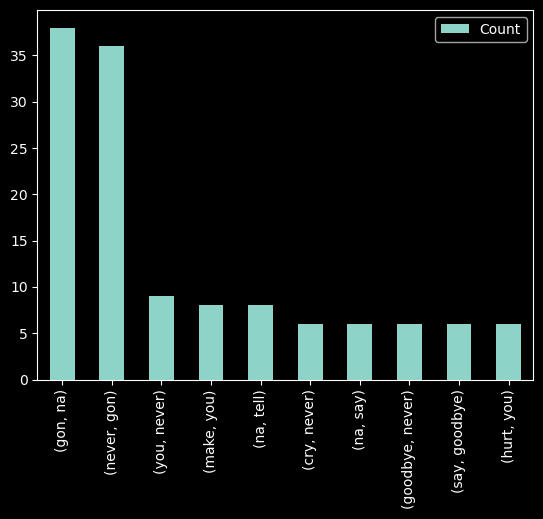

In [152]:
from nltk.util import ngrams
gram5 = list(ngrams(tokens, 2))
freq_5grams = nltk.FreqDist(gram5)
df_grams_plot(freq_5grams)


# Building and Training a FeedForward Neural Network for Language Modeling

### 📋 Step 1: Install Required Libraries
First, we need to install all necessary libraries for our language modeling project.

In [1]:
!pip install nltk
!pip install scikit-learn
!pip install torch==2.6.0
!pip install torchtext==0.17.2
!pip install matplotlib
!pip install pandas
!pip install numpy==1.26.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 60.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 71.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 66.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 71.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 61.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 66.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 69.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 68.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━

### Step2: Import Required Libraries:
Import all necessary libraries for data processing, model building, and visualization 

In [ ]:
##cleaner, standardized, and logically grouped import section organized by purpose (system, utilities, data handling, visualization, NLP, ML/Deep Learning, and warnings), 

In [1]:
# ===============================
# System and Utility Libraries
# ===============================
import warnings                     # Suppress and manage warning messages
import time                         # Measure execution time or delays
import random                       # Generate random numbers for reproducibility
import re                            # Perform regex-based string processing
from collections import OrderedDict  # Maintain dictionary order (for consistent results)
from tqdm import tqdm                # Display progress bars for loops

# ===============================
# Data Handling and Analysis
# ===============================
import numpy as np                   # Numerical operations and array manipulations
import pandas as pd                  # Handle and analyze tabular data efficiently

# ===============================
# Visualization
# ===============================
import matplotlib.pyplot as plt      # Plot and visualize data

# ===============================
# Natural Language Processing
# ===============================
import nltk                          # Tokenization and text preprocessing
from nltk.tokenize import word_tokenize  # Basic word tokenization using NLTK

# Download NLTK components silently
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)

import string                        # Handle string constants and punctuation
from torchtext.data.utils import get_tokenizer       # Tokenizer utility for text datasets
from torchtext.vocab import build_vocab_from_iterator # Build vocabulary for NLP tasks

# ===============================
# Machine Learning / Deep Learning
# ===============================
import torch                         # Core PyTorch library for tensors and GPU computing
import torch.nn as nn                # Define neural network layers
import torch.nn.functional as F      # Access activation functions and operations
import torch.optim as optim          # Optimization algorithms (SGD, Adam, etc.)
from sklearn.manifold import TSNE    # Dimensionality reduction and visualization

# ===============================
# Warning Suppression
# ===============================
warnings.simplefilter('ignore')      # Ignore all warnings globally

def warn(*args, **kwargs):           # Custom suppression hook
    pass
warnings.warn = warn


### 📝 Step 3: Prepare the Dataset
Load the song lyrics that will be used for training our language model.

In [2]:
song = """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""

### 🔧 Step 4: Define Text Preprocessing Functions
Create functions to clean and preprocess the text data:

✅ Remove special characters
✅ Remove whitespace and digits
✅ Convert to lowercase
✅ Tokenize text

In [ ]:
def preprocess_string(s):
    """
    Clean individual strings by removing non-word characters, 
    whitespace, and digits.
    """
    s = re.sub(r"[^\w\s]", '', s)
    s = re.sub(r"\s+", '', s)
    s = re.sub(r"\d", '', s)
    return s

def preprocess(words):
    """
    Preprocess text by tokenizing, cleaning, and normalizing.
    Returns a list of cleaned lowercase tokens.
    """
    tokens = word_tokenize(words)  # tokenizer with nltk
    tokens = [preprocess_string(w) for w in tokens]
    return [w.lower() for w in tokens if len(w) != 0 and w not in string.punctuation]
  


In [4]:
  # Apply preprocessing to the song
tokens = preprocess(song)
print(f"Total tokens: {len(tokens)}")
print(f"First 10 tokens: {tokens[:10]}")

Total tokens: 385
First 10 tokens: ['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']


### 🏗️ Step 5: Build Vocabulary and Tokenization Pipeline
Create vocabulary mapping and tokenization functions:

🔤 Map words to unique indices
🔢 Handle unknown words with <unk> token

In [9]:
# Initialize tokenizer
tokenizer = get_tokenizer("basic_english")  # tokenizer by torchtext

def tokenizetext(song):
    """
    Build vocabulary from tokenized text with special <unk> token.
    """
    tokenized_song = map(tokenizer, song.split())
    vocab = build_vocab_from_iterator(tokenized_song, specials=["<unk>"])
    vocab.set_default_index(vocab["<unk>"])
    return vocab

# Build vocabulary
vocab = tokenizetext(song)

# Create text processing pipeline
text_pipeline = lambda x: vocab(tokenizer(x))

# Get index-to-token mapping
index_to_token = vocab.get_itos()


print(f"Vocabulary size: {len(vocab)}")
print(f"Sample token indices: {vocab(tokens[0:10])}")
print(f"Sample tokens: {tokens[0:10]}")

Vocabulary size: 79
Sample token indices: [21, 58, 70, 74, 25, 69, 2, 20, 31, 72]
Sample tokens: ['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']


### 🎯 Step 6: Create Embedding Layer Function
Define function to generate word embeddings:

📊 Convert word indices to dense vectors
🧮 Enable model to learn word relationships

In [10]:
def genembedding(vocab, embedding_dim=20):
    """
    Generate embedding layer for the vocabulary.
    Each word is represented as a dense vector.
    """
    vocab_size = len(vocab)
    embeddings = nn.Embedding(vocab_size, embedding_dim)
    return embeddings

# Create embeddings
embeddings = genembedding(vocab)

# Test embeddings
for n in range(2):
    embedding = embeddings(torch.tensor(n))
    print(f"Word: {index_to_token[n]}")
    print(f"Index: {n}")
    print(f"Embedding shape: {embedding.shape}\n")

Word: <unk>
Index: 0
Embedding shape: torch.Size([20])

Word: gonna
Index: 1
Embedding shape: torch.Size([20])



### 🔄 Step 7: Generate N-grams (Context-Target Pairs)
Create training data by generating context-target word pairs:

📝 Context: Previous N words
🎯 Target: Word to predict

In [12]:
CONTEXT_SIZE = 2

def genngrams(tokens):
    """
    Generate n-grams from tokens.
    Each n-gram contains context words and a target word.
    """
    ngrams = [( [tokens[i - j - 1] for j in range(CONTEXT_SIZE)],tokens[i])   for i in range(CONTEXT_SIZE, len(tokens))
    ]
    return ngrams

# Generate n-grams
ngrams = genngrams(tokens)
context, target = ngrams[0]

print(f"Context: {context}, Target: {target}")
print(f"Context indices: {vocab(context)}, Target index: {vocab([target])}")

Context: ['are', 'we'], Target: no
Context indices: [58, 21], Target index: [70]


### 📦 Step 8: Create Batch Processing Function
Implement data loader with batch collation:

🔢 Process data in batches
⚙️ Prepare context and target tensors

In [13]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
CONTEXT_SIZE = 3
BATCH_SIZE = 10
EMBEDDING_DIM = 10

def collate_batch(batch):
    """
    Process batch of text data into context and target tensors.
    """
    batch_size = len(batch)
    context, target = [], []
    
    for i in range(CONTEXT_SIZE, batch_size):
        target.append(vocab([batch[i]]))
        context.append(vocab([batch[i - j - 1] for j in range(CONTEXT_SIZE)]))
    
    return torch.tensor(context).to(device), torch.tensor(target).to(device).reshape(-1)

# Add padding to make batch size compatible
Padding = BATCH_SIZE - len(tokens) % BATCH_SIZE
tokens_pad = tokens + tokens[0:Padding]

print(f"Original tokens: {len(tokens)}")
print(f"Padded tokens: {len(tokens_pad)}")

Original tokens: 385
Padded tokens: 390


### 🗂️ Step 9: Create DataLoader
Set up PyTorch DataLoader for efficient batch processing.

In [14]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    tokens_pad, 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    collate_fn=collate_batch
)

print(f"Number of batches: {len(dataloader)}")

Number of batches: 39


### 🧠 Step 10: Define the Neural Network Model
Build the N-gram Language Model architecture:

🔤 Embedding layer
🔗 Hidden layer with ReLU activation
📊 Output layer for vocabulary prediction

In [15]:
class NGramLanguageModeler(nn.Module):
    """
    N-gram language model that predicts the next word 
    given a sequence of context words.
    """
    
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        
        self.context_size = context_size
        self.embedding_dim = embedding_dim
        
        # Embedding layer
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        # Hidden layer
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        
        # Output layer
        self.linear2 = nn.Linear(128, vocab_size)
    
    def forward(self, inputs):
        """Forward pass through the network."""
        embeds = self.embeddings(inputs)
        embeds = torch.reshape(embeds, (-1, self.context_size * self.embedding_dim))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        return out

# Create model instance
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
print(model)

NGramLanguageModeler(
  (embeddings): Embedding(79, 10)
  (linear1): Linear(in_features=30, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=79, bias=True)
)


### 🎲 Step 11: Test Model Output (Before Training)
Verify model structure by passing sample data through it.

In [16]:
# Get a batch of data
context, target = next(iter(dataloader))
print(f"Context shape: {context.shape}")
print(f"Target shape: {target.shape}")

# Forward pass
out = model(context)
print(f"Output shape: {out.shape}")

# Get predictions
predicted_index = torch.argmax(out, 1)
predicted_words = [index_to_token[i.item()] for i in predicted_index]
print(f"Predicted words (untrained): {predicted_words[:5]}")

Context shape: torch.Size([7, 3])
Target shape: torch.Size([7])
Output shape: torch.Size([7, 79])
Predicted words (untrained): ['hearts', 'get', 'ask', 'run', 'lie']


### ✍️ Step 12: Define Text Generation Functions
Create helper functions for generating text and selecting random lines:

🎵 Generate new song lyrics
🎲 Pick random starting lines

In [17]:
def write_song(model, my_song, number_of_words=100):
    """
    Generate text using the trained model.
    """
    index_to_token = vocab.get_itos()
    
    for i in range(number_of_words):
        with torch.no_grad():
            context = torch.tensor(
                vocab([tokens[i - j - 1] for j in range(CONTEXT_SIZE)])
            ).to(device)
            
            word_idx = torch.argmax(model(context))
            my_song += " " + index_to_token[word_idx.detach().item()]
    
    return my_song

def pickrandomline(song):
    """Select a random line from the song."""
    lines = song.split("\n")
    selected_line = random.choice(lines).strip()
    return selected_line

# Test text generation (before training)
selected_line = pickrandomline(song)
generated_song = write_song(model, selected_line, number_of_words=20)
print(f"Generated text (untrained):\n{generated_song}")

Generated text (untrained):
Never gonna let you down any inside ask hearts get ask run lie ask going both ask inside just but get your down but youre


### 🏋️ Step 13: Define Training Function
Implement the training loop with loss tracking and text generation:

📉 Train model over multiple epochs
📊 Track loss values
🎵 Generate sample text periodically

In [18]:
def train(dataloader, model, song, number_of_epochs=100, show=10):
    """
    Train the language model and track performance.
    """
    MY_LOSS = []
    
    for epoch in tqdm(range(number_of_epochs)):
        total_loss = 0
        my_song = ""
        
        for context, target in dataloader:
            model.zero_grad()
            predicted = model(context)
            loss = criterion(predicted, target.reshape(-1))
            total_loss += loss.item()
            
            loss.backward()
            optimizer.step()
        
        # Display progress at intervals
        if epoch % show == 0:
            selected_line = pickrandomline(song)
            my_song += write_song(model, selected_line)
            
            print(f"\n{'='*50}")
            print(f"Epoch {epoch} - Generated Song:")
            print(f"{'='*50}")
            print(my_song)
        
        MY_LOSS.append(total_loss / len(dataloader))
    
    return MY_LOSS

### 🎯 Step 14: Train Model with Context Size = 2
Train the first model with a context window of 2 words:

⚙️ Set up optimizer and learning rate scheduler
🚀 Train the model
💾 Save the trained model

In [19]:
# Initialize storage for losses
my_loss_list = []

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Set context size
CONTEXT_SIZE = 2

# Create model
model_2 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define optimizer
optimizer = optim.SGD(model_2.parameters(), lr=0.01)

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)

# Train the model
print("Training 2-gram model...")
my_loss = train(dataloader, model_2, song, number_of_epochs=100, show=20)

# Save model
save_path = '2gram.pth'
torch.save(model_2.state_dict(), save_path)
my_loss_list.append(my_loss)
print(f"Model saved to {save_path}")

Training 2-gram model...


  0%|          | 0/100 [00:00<?, ?it/s]


Epoch 0 - Generated Song:
Never gonna make you cry <unk> <unk> inside feeling you <unk> <unk> <unk> whats <unk> <unk> your <unk> <unk> <unk> if <unk> and <unk> feeling <unk> <unk> you <unk> inside <unk> you <unk> whats <unk> <unk> <unk> <unk> <unk> you inside <unk> <unk> <unk> <unk> <unk> you whats <unk> <unk> <unk> <unk> feeling going whats <unk> <unk> <unk> you whats <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> <unk> you whats <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> you inside <unk> <unk> <unk> <unk> <unk> <unk> you <unk> you <unk> <unk> <unk> <unk> whats <unk> <unk> <unk> <unk> you <unk>


 20%|██        | 20/100 [00:05<00:24,  3.24it/s]


Epoch 20 - Generated Song:
Never gonna say goodbye never never and never you never you never you never you and you you never never and and you never <unk> and never never and you you never never <unk> and never <unk> tell you never you <unk> <unk> <unk> tell you never never <unk> <unk> tell you never never <unk> <unk> tell you never never <unk> <unk> tell you and never you never <unk> <unk> tell you never never <unk> <unk> tell you never <unk> <unk> tell you <unk> and hurt <unk> never never never you never you <unk> you <unk> you <unk> never never you <unk> you you


 39%|███▉      | 39/100 [00:11<00:18,  3.25it/s]


Epoch 40 - Generated Song:
Never gonna make you cry never never and strangers you never you never you game you and you you never never and hurt you feeling <unk> and never never and im you never never <unk> hurt never <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you down never <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you been and hurt you never never never you never never <unk> you <unk> been aching but never too <unk> to you


 61%|██████    | 61/100 [00:17<00:10,  3.64it/s]


Epoch 60 - Generated Song:
Never gonna tell a lie and hurt you never never no strangers to never you never im game you and you i never never and hurt you feeling <unk> and we never know im you never never <unk> we never <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you we never <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other never to <unk> you <unk> been aching but never too shy to you


 79%|███████▉  | 79/100 [00:22<00:05,  3.66it/s]


Epoch 80 - Generated Song:
Never gonna tell a lie and hurt you never never no strangers to know you know the game <unk> and you i a full and what im feeling <unk> and we never know im we other been i we never <unk> tell you how im feeling <unk> <unk> tell you understand never <unk> <unk> tell you up never <unk> <unk> tell you down never <unk> <unk> tell you and desert you never <unk> <unk> tell you understand never <unk> <unk> tell goodbye never <unk> <unk> tell you lie and hurt you never known each other for how <unk> your <unk> been aching but youre too shy to you


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]

Model saved to 2gram.pth


### 📊 Step 15: Visualize Word Embeddings (2-gram)
Use t-SNE to visualize word embeddings in 2D space:

🎨 Show how similar words cluster together
📍 Annotate top 20 words

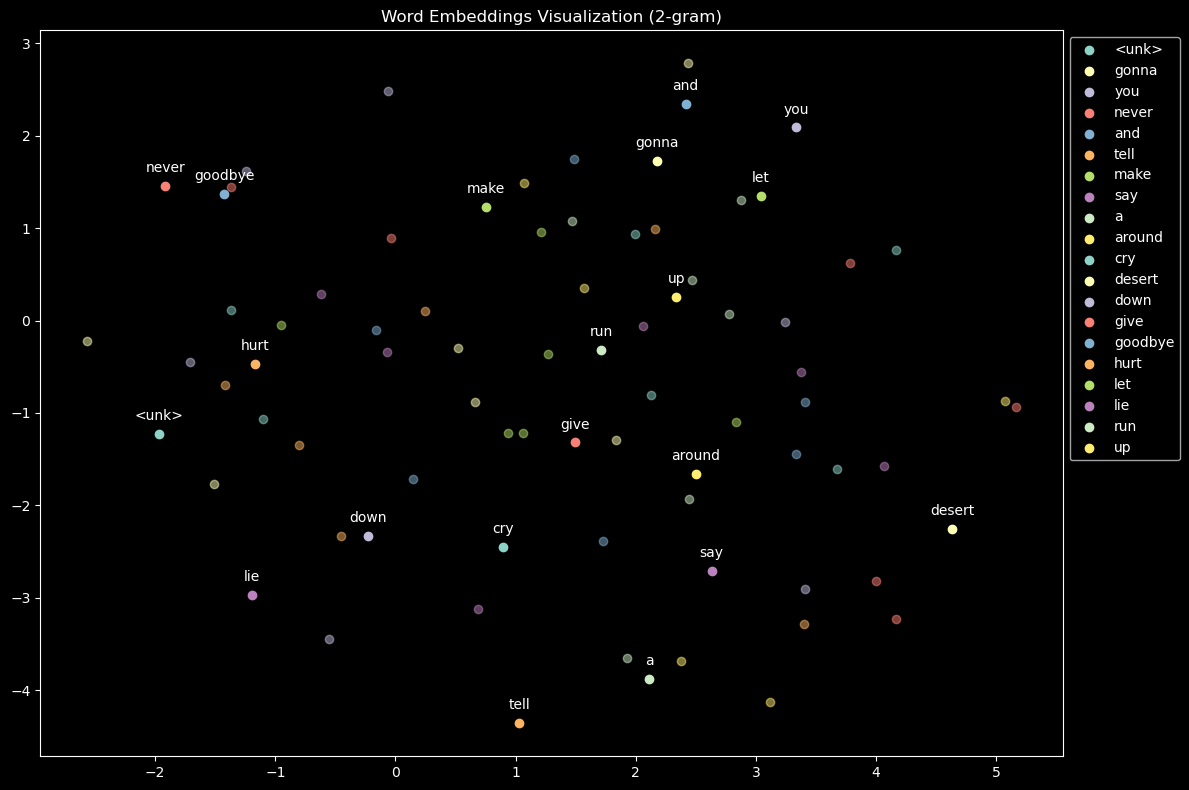

In [20]:
# Extract embeddings
X = model_2.embeddings.weight.cpu().detach().numpy()

# Apply t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

# Plot embeddings
labels = []
plt.figure(figsize=(12, 8))

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], alpha=0.5)

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Word Embeddings Visualization (2-gram)")
plt.tight_layout()
plt.show()

### 🎯 Step 16: Train Model with Context Size = 4
Train a second model with larger context window:

📈 Increased context should improve predictions
🔄 Repeat training process

In [21]:
CONTEXT_SIZE = 4

# Create model
model_4 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define optimizer
optimizer = optim.SGD(model_4.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

# Train the model
print("Training 4-gram model...")
my_loss = train(dataloader, model_4, song, number_of_epochs=100, show=20)

# Save model
save_path = '4gram.pth'
torch.save(model_4.state_dict(), save_path)
my_loss_list.append(my_loss)
print(f"Model saved to {save_path}")

Training 4-gram model...


  1%|          | 1/100 [00:00<01:06,  1.49it/s]


Epoch 0 - Generated Song:
You wouldnt get this from any other guy you <unk> say <unk> <unk> <unk> <unk> <unk> from you <unk> say other you never you <unk> <unk> <unk> from <unk> <unk> you <unk> <unk> <unk> <unk> <unk> you to say never <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> never <unk> never <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> say <unk> you <unk> <unk> <unk> you <unk> other you to say strangers <unk> <unk> you <unk> you never


 19%|█▉        | 19/100 [00:05<00:22,  3.54it/s]


Epoch 20 - Generated Song:
Inside we both know whats been going on never <unk> never <unk> to <unk> you <unk> never you <unk> say you never never <unk> <unk> never <unk> you you never <unk> im im <unk> you never down never <unk> <unk> <unk> tell you down im feeling <unk> <unk> say you never never <unk> <unk> give you never never <unk> <unk> let you down never <unk> <unk> say goodbye never <unk> you never <unk> <unk> make you never never <unk> <unk> say goodbye never <unk> <unk> tell you down never <unk> you never <unk> <unk> other for <unk> you down never you <unk> <unk> <unk> you <unk> <unk> you


 38%|███▊      | 38/100 [00:10<00:16,  3.78it/s]


Epoch 40 - Generated Song:
Never gonna say goodbye never never we <unk> to love you <unk> whats you <unk> were you never never <unk> <unk> never im feeling know never we im feeling from other other down i <unk> <unk> <unk> tell you down im feeling <unk> <unk> say you how never <unk> <unk> give you never never <unk> <unk> let you down never <unk> <unk> give goodbye never im you never <unk> <unk> make you how never <unk> <unk> say goodbye never <unk> <unk> tell you down never <unk> you never <unk> each other for so other down never been whats but youre too <unk> <unk> say


 58%|█████▊    | 58/100 [00:16<00:12,  3.30it/s]


Epoch 60 - Generated Song:
Never gonna run around and desert you never are no strangers to love you know the rules im were you never a full commitments never im thinking know never we im this from any other guy i you <unk> <unk> tell you how im feeling <unk> <unk> say you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run goodbye never im you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell you lie never <unk> you never known each other for so long down never been aching but youre too shy to say


 81%|████████  | 81/100 [00:23<00:05,  3.21it/s]


Epoch 80 - Generated Song:
Never gonna give you up never are no strangers to love you know the rules im were you never a full commitments what im thinking know never we im this from any other guy i you <unk> <unk> tell you how im feeling <unk> <unk> say you understand never <unk> <unk> give you up never <unk> <unk> let you down never <unk> <unk> run around never im you never <unk> <unk> make you understand never <unk> <unk> say goodbye never <unk> <unk> tell you lie never <unk> you never known each other for so long down never been aching but youre too shy to say


100%|██████████| 100/100 [00:28<00:00,  3.51it/s]


Model saved to 4gram.pth


### 📊 Step 17: Visualize Word Embeddings (4-gram)
Visualize embeddings from the 4-gram model.

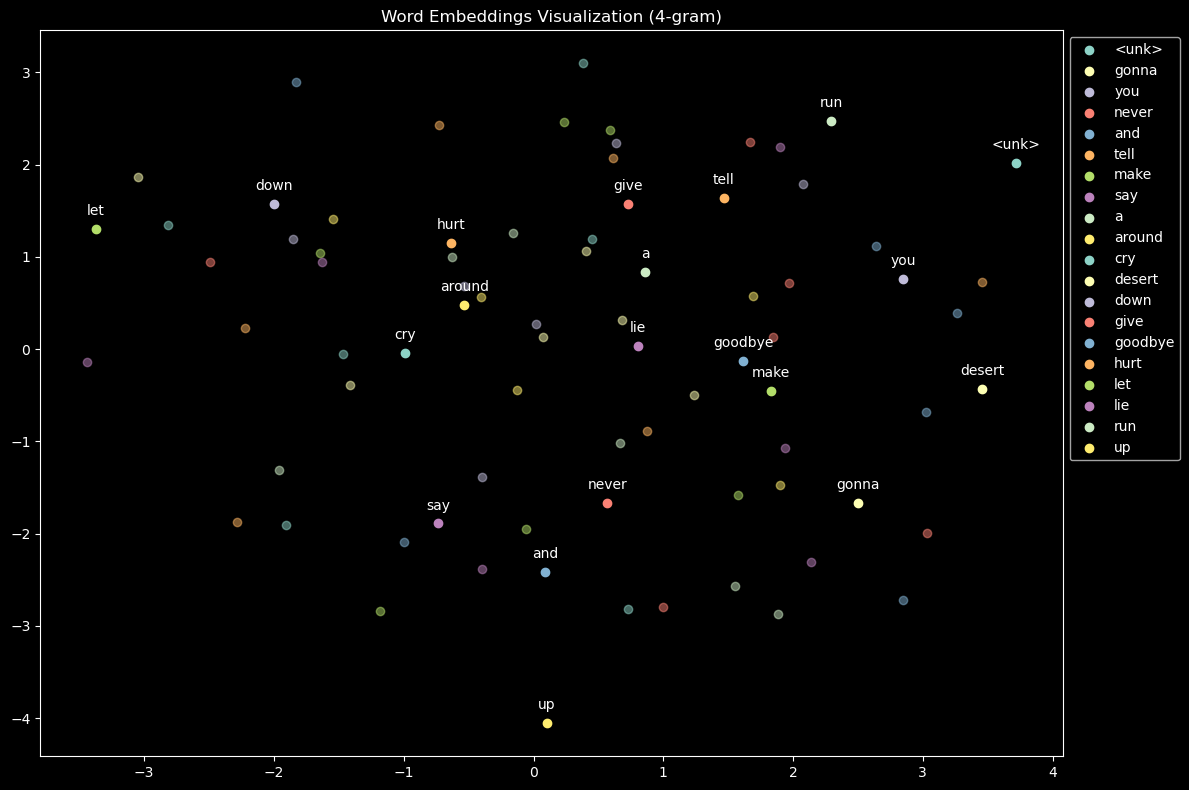

In [22]:
# Extract embeddings
X = model_4.embeddings.weight.cpu().detach().numpy()

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

# Plot embeddings
labels = []
plt.figure(figsize=(12, 8))

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], alpha=0.5)

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Word Embeddings Visualization (4-gram)")
plt.tight_layout()
plt.show()

### 🎯 Step 18: Train Model with Context Size = 8
Train the final model with the largest context window:

🎓 Maximum context for best predictions
📊 Compare performance across all models

In [23]:
CONTEXT_SIZE = 8

# Create model
model_8 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define optimizer
optimizer = optim.SGD(model_8.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

# Train the model
print("Training 8-gram model...")
my_loss = train(dataloader, model_8, song, number_of_epochs=100, show=20)

# Save model
save_path = '8gram.pth'
torch.save(model_8.state_dict(), save_path)
my_loss_list.append(my_loss)
print(f"Model saved to {save_path}")

Training 8-gram model...


  0%|          | 0/100 [00:00<?, ?it/s]


Epoch 0 - Generated Song:
Never gonna say goodbye <unk> <unk> <unk> you your <unk> <unk> <unk> <unk> <unk> <unk> you you <unk> <unk> your ask <unk> <unk> <unk> commitments you <unk> you <unk> your for rules <unk> <unk> <unk> ask <unk> <unk> were <unk> <unk> <unk> give <unk> <unk> you <unk> rules <unk> <unk> <unk> you weve <unk> <unk> <unk> <unk> you rules <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> cry <unk> <unk> you <unk> <unk> <unk> <unk> <unk> you <unk> <unk> <unk> <unk> you ask <unk> <unk> <unk> <unk> <unk> <unk> commitments <unk> <unk> <unk> cry <unk> <unk> <unk> <unk> <unk> <unk> <unk> commitments <unk>


 19%|█▉        | 19/100 [00:04<00:20,  4.02it/s]


Epoch 20 - Generated Song:
You wouldnt get this from any other guy <unk> to <unk> strangers to <unk> to <unk> the rules <unk> you tell <unk> play give you you im thinking <unk> <unk> give <unk> <unk> to you you guy i you give you give you <unk> im feeling <unk> <unk> give you never never <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> <unk> <unk> make you cry never <unk> <unk> give you im never <unk> tell a lie never <unk> tell <unk> <unk> <unk> other for so long make <unk> <unk> to <unk> <unk> too shy to say


 38%|███▊      | 38/100 [00:08<00:12,  4.81it/s]


Epoch 40 - Generated Song:
I just wanna tell you how Im feeling <unk> lie <unk> strangers to you long rules the rules <unk> going to <unk> play it and you im thinking <unk> <unk> give feeling strangers been for you guy i you give we give you <unk> im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> been <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> tell <unk> <unk> <unk> other for so long i <unk> <unk> to <unk> <unk> too shy to say


 59%|█████▉    | 59/100 [00:12<00:08,  5.12it/s]


Epoch 60 - Generated Song:
Never gonna tell a lie and hurt you <unk> lie <unk> strangers to you long rules the rules <unk> going to <unk> play it and you im thinking <unk> <unk> give feeling strangers been for you guy i you give we give you <unk> im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> been <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> tell <unk> play <unk> other for so long i <unk> <unk> to <unk> <unk> too shy to say


 85%|████████▌ | 85/100 [00:16<00:02,  6.99it/s]


Epoch 80 - Generated Song:
Never gonna give you up <unk> lie <unk> strangers to you long rules the rules <unk> going to <unk> play it and you im thinking <unk> <unk> give feeling strangers been for you guy i you give we give you <unk> im feeling <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> give you up never <unk> <unk> run around up never <unk> <unk> been <unk> make you cry never <unk> <unk> give you up never <unk> tell a lie never <unk> tell <unk> play <unk> other for so long i <unk> <unk> to <unk> <unk> too shy to say


100%|██████████| 100/100 [00:19<00:00,  5.14it/s]

Model saved to 8gram.pth


### 📊 Step 19: Visualize Word Embeddings (8-gram)
Visualize embeddings from the 8-gram model.

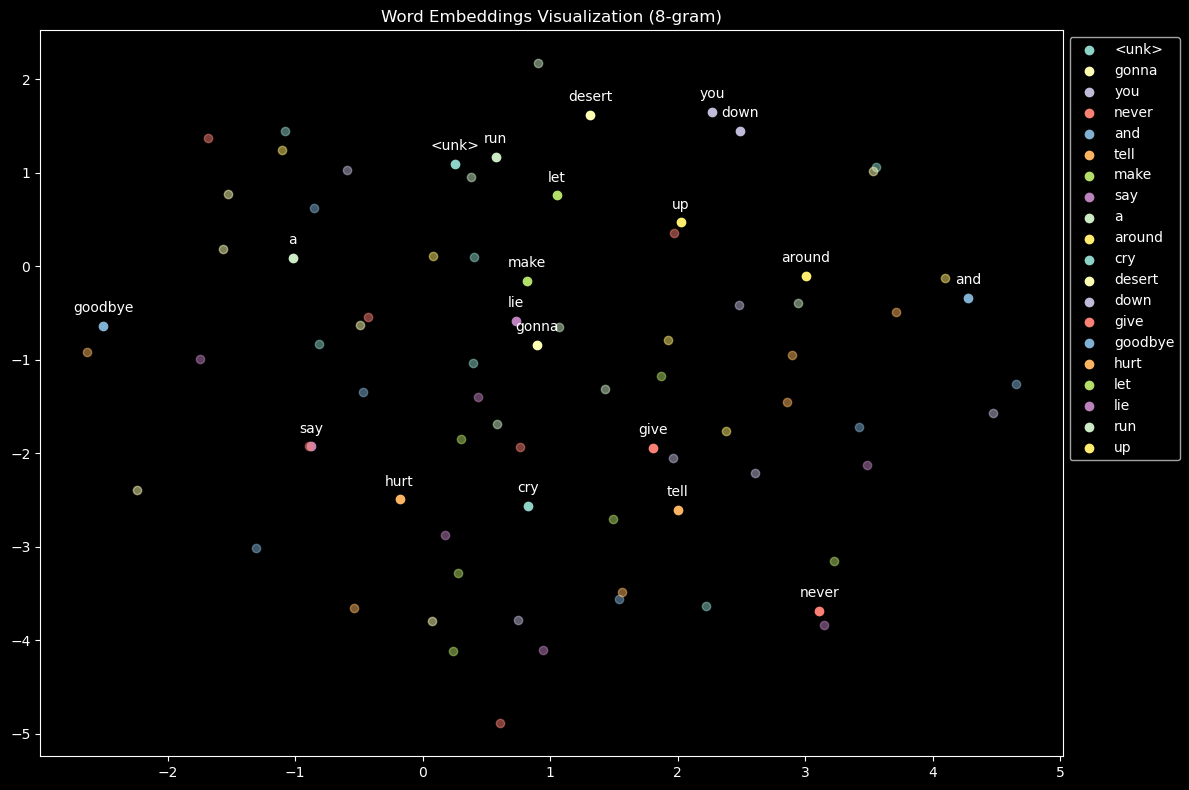

In [24]:
# Extract embeddings
X = model_8.embeddings.weight.cpu().detach().numpy()

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

# Plot embeddings
labels = []
plt.figure(figsize=(12, 8))

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], alpha=0.5)

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Word Embeddings Visualization (8-gram)")
plt.tight_layout()
plt.show()

### 📉 Step 20: Compare Model Performance (Loss)
Plot cross-entropy loss for all three models:

📊 Visualize training progress
🔍 Compare convergence rates



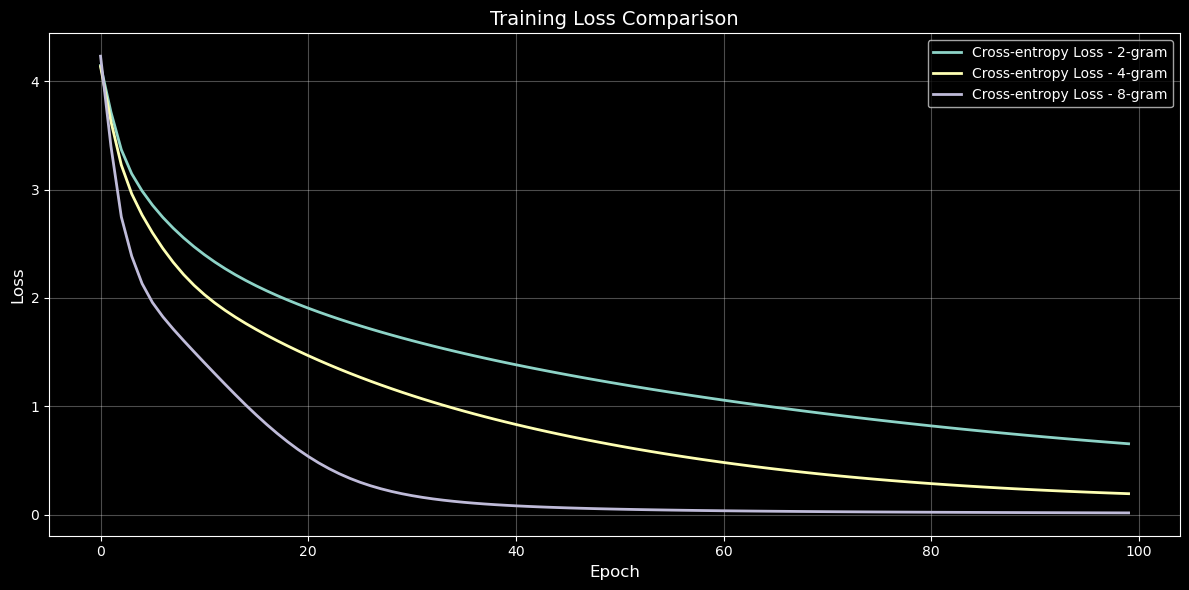

In [25]:
plt.figure(figsize=(12, 6))

for (my_loss, model_name) in zip(my_loss_list, ["2-gram", "4-gram", "8-gram"]):
    plt.plot(my_loss, label=f"Cross-entropy Loss - {model_name}", linewidth=2)

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training Loss Comparison", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 📊 Step 21: Calculate and Plot Perplexity
Compute perplexity metric for better model evaluation:

📐 Perplexity = exp(loss)
📉 Lower perplexity = better model

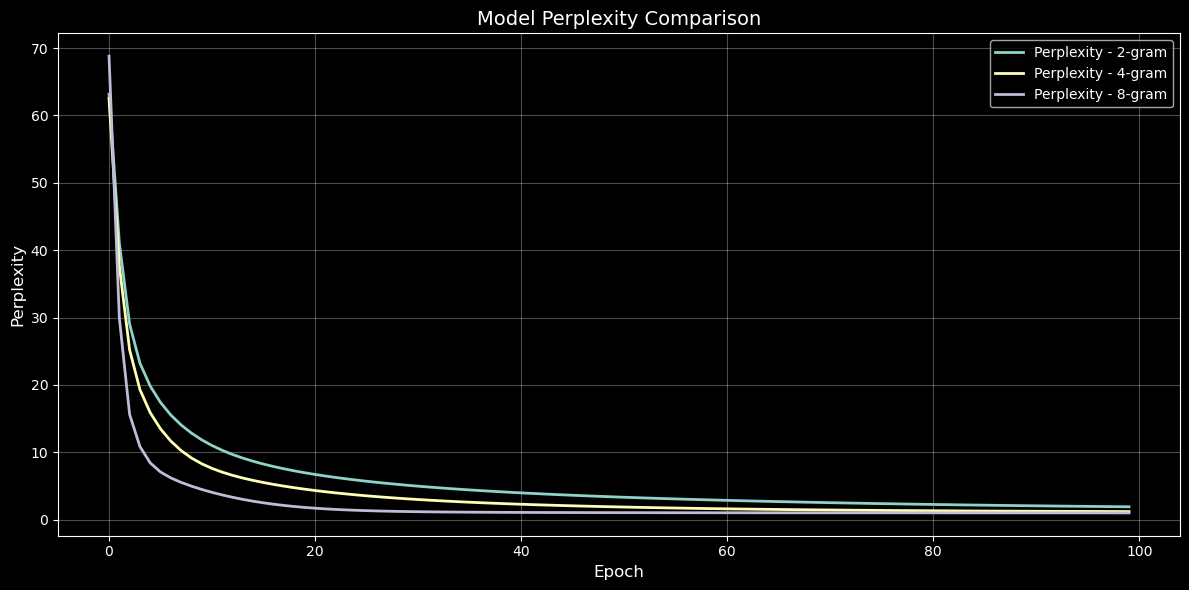

In [26]:
plt.figure(figsize=(12, 6))

for (my_loss, model_name) in zip(my_loss_list, ["2-gram", "4-gram", "8-gram"]):
    # Calculate perplexity
    perplexity = np.exp(my_loss)
    plt.plot(perplexity, label=f"Perplexity - {model_name}", linewidth=2)

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Perplexity", fontsize=12)
plt.title("Model Perplexity Comparison", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()